In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = "C:/Users/AKASH HN/Downloads/Dataset/winequalityN.csv"
data = pd.read_csv(path)
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [3]:
wine = data.dropna(axis = 0)
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Converting Qualit of Wine to Good And Bad

In [4]:
wine['quality'] = pd.cut(wine['quality'],bins = (2,5,9),labels = ['bad','good'])
wine['quality'].unique()

['good', 'bad']
Categories (2, object): ['bad' < 'good']

Label Encoding

In [5]:
encoder = LabelEncoder()
wine['quality'] = encoder.fit_transform(wine['quality'])
wine['type'] = encoder.fit_transform(wine['type'])
wine.tail(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0
6496,0,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,1


In [6]:
wine['quality'].value_counts()


quality
1    4091
0    2372
Name: count, dtype: int64

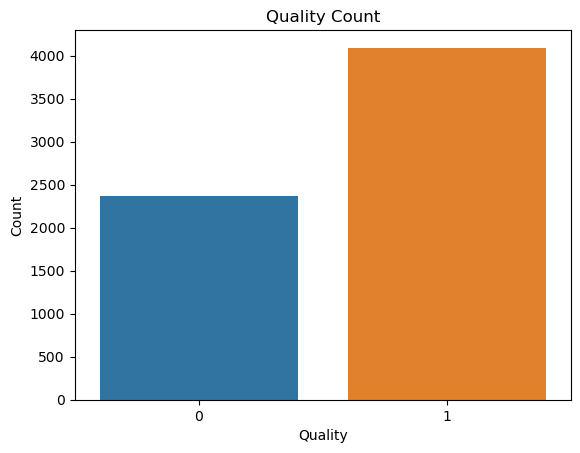

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset (you can replace this with your own data)
titanic = sns.load_dataset("titanic")

# Show the count of passengers in each class
sns.countplot(data = wine,x = 'quality')
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Quality Count")
plt.show()


Splitting data

In [8]:
X = wine.drop('quality',axis = 1)
y = wine['quality']

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
X_test[:2]

array([[ 5.70947476e-01, -3.15533729e-01, -1.20589147e-01,
         3.49414521e-01, -4.34530368e-01, -9.47336125e-01,
        -6.57713719e-01, -5.16851056e-01, -1.49726451e+00,
        -4.86537105e-01, -8.54530918e-04,  1.84349275e+00],
       [-1.75147460e+00,  3.14788643e+00,  1.85006604e-01,
         6.21350855e-01, -6.64805468e-01,  9.15778768e-01,
        -1.39018386e+00, -1.77360291e+00,  1.36312374e+00,
        -7.95258090e-01,  1.83428348e+00, -9.93832811e-01]])

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
model = LogisticRegression()
model.fit(X_train,y_train)
train_pred = model.predict(X_train)
print('Accuracy of Logistic Regression model: ',round(model.score(X_test,y_test)*100,2),'%')

Accuracy of Logistic Regression model:  75.41 %


In [14]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)
print('Classification Report')
print(classification_report(y_test,pred))
print('Confusion Matrix')
print(confusion_matrix(y_test,pred))
print('Accuracy of Random Forest Classifier: ',round(accuracy_score(pred,y_test)*100,2),'%')

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       458
           1       0.86      0.89      0.87       835

    accuracy                           0.83      1293
   macro avg       0.82      0.81      0.82      1293
weighted avg       0.83      0.83      0.83      1293

Confusion Matrix
[[339 119]
 [ 96 739]]
Accuracy of Random Forest Classifier:  83.37 %


In [15]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
print('Classification Report')
print(classification_report(y_test,pred))
print('Confusion Matrix')
print(confusion_matrix(y_test,pred))
print('Accuracy of SVM : ',round(accuracy_score(pred,y_test)*100,2),'%')

Classification Report
              precision    recall  f1-score   support

           0       0.71      0.64      0.68       458
           1       0.81      0.86      0.84       835

    accuracy                           0.78      1293
   macro avg       0.76      0.75      0.76      1293
weighted avg       0.78      0.78      0.78      1293

Confusion Matrix
[[295 163]
 [118 717]]
Accuracy of SVM :  78.27 %


Prediction of Quality of wine

In [16]:
xn = [ [0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0]	]
xnew = scaler.transform(xn)
xpred = rfc.predict(xnew)
if xpred:
    print('Good ')
else:
    print('Bad ')


Good 
